<a href="https://colab.research.google.com/github/Josephtelang/census-income-decision-rf/blob/main/Census_Income_Classification_Using_Decision_Trees_%26_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets --quiet

In [2]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os

%matplotlib inline

In [3]:
od.download("https://www.kaggle.com/datasets/uciml/adult-census-income")

Dataset URL: https://www.kaggle.com/datasets/uciml/adult-census-income


100%|██████████| 450k/450k [00:00<00:00, 429MB/s]

In [4]:
os.listdir("adult-census-income")

['adult.csv']

In [5]:
raw_df = pd.read_csv("/content/adult-census-income/adult.csv",na_values="?")

In [6]:
raw_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
raw_df.isnull().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0


In [9]:
raw_df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
raw_df["income"] = raw_df["income"].map({">50K":1, "<=50K":0})

In [11]:
raw_df["income"]

,income
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,0
32558,1
32559,0


In [12]:
raw_df.drop(columns="education",inplace=True)

In [13]:
cate_columns = raw_df.select_dtypes(include="object").columns

In [14]:
cate_columns

Index(['workclass', 'marital.status', 'occupation', 'relationship', 'race',
       'sex', 'native.country'],
      dtype='object')

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
imputer = SimpleImputer(strategy="most_frequent")

In [17]:
imputer.fit(raw_df[cate_columns])

SimpleImputer(strategy='most_frequent')

In [18]:
raw_df[cate_columns] = imputer.transform(raw_df[cate_columns])

In [19]:
raw_df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0
capital.gain,0


In [20]:
target_col = raw_df["income"]
target_col

,income
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,0
32558,1
32559,0


In [21]:
raw_df.drop(columns="income",inplace=True)
raw_df

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,77053,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States
32557,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32558,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32559,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States


In [22]:
numeric_col = raw_df.select_dtypes(include="number").columns.tolist()

In [23]:
numeric_col

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train_X,test_val_X,train_Y,test_val_Y = train_test_split(raw_df,target_col,test_size=0.30,random_state=42)
val_X,test_X,val_Y,test_Y = train_test_split(test_val_X,test_val_Y,test_size=0.5,random_state=42)

In [26]:
print(f"train shape: {train_X.shape,train_Y.shape}")
print(f"val_shape: {val_X.shape,val_Y.shape}")
print(f"test_shape: {test_X.shape,test_Y.shape}")

train shape: ((22792, 13), (22792,))
val_shape: ((4884, 13), (4884,))
test_shape: ((4885, 13), (4885,))


In [27]:
raw_df.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,77053,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [28]:
raw_df.select_dtypes(include="object").nunique()

,0
workclass,8
marital.status,7
occupation,14
relationship,6
race,5
sex,2
native.country,41


In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
encoder = OneHotEncoder(sparse_output=False,handle_unknown="ignore",min_frequency=100)

encoder.fit(raw_df[cate_columns])

encoded_col = list(encoder.get_feature_names_out())
encoded_col

['workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_infrequent_sklearn',
 'marital.status_Divorced',
 'marital.status_Married-civ-spouse',
 'marital.status_Married-spouse-absent',
 'marital.status_Never-married',
 'marital.status_Separated',
 'marital.status_Widowed',
 'marital.status_infrequent_sklearn',
 'occupation_Adm-clerical',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
 'occupation_Priv-house-serv',
 'occupation_Prof-specialty',
 'occupation_Protective-serv',
 'occupation_Sales',
 'occupation_Tech-support',
 'occupation_Transport-moving',
 'occupation_infrequent_sklearn',
 'relationship_Husband',
 'relationship_Not-in-family',
 'relationship_Other-relative',
 'relationship_Own-child',
 'relationship_Unmarried',
 'relationship_Wi

In [31]:
train_X[encoded_col] = encoder.transform(train_X[cate_columns])
test_X[encoded_col] = encoder.transform(test_X[cate_columns])
val_X[encoded_col] = encoder.transform(val_X[cate_columns])

In [32]:
train_X

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,...,sex_Male,native.country_Canada,native.country_El-Salvador,native.country_Germany,native.country_India,native.country_Mexico,native.country_Philippines,native.country_Puerto-Rico,native.country_United-States,native.country_infrequent_sklearn
19749,58,Private,290661,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1216,62,Private,109463,10,Separated,Sales,Unmarried,White,Female,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27962,33,Private,137088,13,Married-civ-spouse,Machine-op-inspct,Husband,Other,Male,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23077,24,Private,117767,12,Never-married,Sales,Own-child,White,Male,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10180,67,Self-emp-not-inc,431426,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,25,Private,410240,9,Never-married,Craft-repair,Own-child,White,Male,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5390,51,Private,146767,11,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
860,55,Federal-gov,238192,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15795,41,Private,154076,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

scaler.fit(raw_df[numeric_col])

train_X[numeric_col] = scaler.transform(train_X[numeric_col])
val_X[numeric_col] = scaler.transform(val_X[numeric_col])
test_X[numeric_col] = scaler.transform(test_X[numeric_col])

In [35]:
train_X.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,...,sex_Male,native.country_Canada,native.country_El-Salvador,native.country_Germany,native.country_India,native.country_Mexico,native.country_Philippines,native.country_Puerto-Rico,native.country_United-States,native.country_infrequent_sklearn
19749,1.423610,Private,0.955795,-0.420060,Married-civ-spouse,Craft-repair,Husband,White,Male,-0.14592,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1216,1.716860,Private,-0.760934,-0.031360,Separated,Sales,Unmarried,White,Female,-0.14592,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27962,-0.409205,Private,-0.499206,1.134739,Married-civ-spouse,Machine-op-inspct,Husband,Other,Male,-0.14592,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23077,-1.069018,Private,-0.682259,0.746039,Never-married,Sales,Own-child,White,Male,-0.14592,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10180,2.083423,Self-emp-not-inc,2.289450,-0.420060,Married-civ-spouse,Adm-clerical,Wife,White,Female,-0.14592,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
type(train_Y)

pandas.core.series.Series

In [37]:
train_input = train_X[numeric_col + encoded_col]
train_target = train_Y
train_target.head()

,income
19749,0
1216,0
27962,0
23077,0
10180,0


In [38]:
train_input.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,sex_Male,native.country_Canada,native.country_El-Salvador,native.country_Germany,native.country_India,native.country_Mexico,native.country_Philippines,native.country_Puerto-Rico,native.country_United-States,native.country_infrequent_sklearn
19749,1.423610,0.955795,-0.420060,-0.14592,-0.216660,-0.035429,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1216,1.716860,-0.760934,-0.031360,-0.14592,3.796205,-0.602358,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27962,-0.409205,-0.499206,1.134739,-0.14592,-0.216660,-0.035429,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23077,-1.069018,-0.682259,0.746039,-0.14592,-0.216660,-1.655225,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10180,2.083423,2.289450,-0.420060,-0.14592,-0.216660,-3.113041,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
val_input = val_X[numeric_col + encoded_col]
val_target = val_Y

In [40]:
test_input = test_X[numeric_col + encoded_col]
test_target = test_Y

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
model1 = DecisionTreeClassifier()

In [43]:
model1.fit(train_input,train_target)
train_m1_pred = model1.predict(train_input)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
train_target.value_counts()

,count
income,
0,17291
1,5501


In [46]:
train_m1_prob = model1.predict_proba(train_input)

In [47]:
train_m1_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [48]:
accuracy_score(train_target,train_m1_pred)

1.0

In [49]:
model1.score(val_input,val_target)

0.8204340704340705

In [50]:
val_target.value_counts()/len(val_target)

,count
income,
0,0.755938
1,0.244062


In [51]:
from sklearn.tree import plot_tree,export_text

In [52]:
model1.classes_

array([0, 1])

In [53]:
class_name = [ str(cls) for cls in model1.classes_]

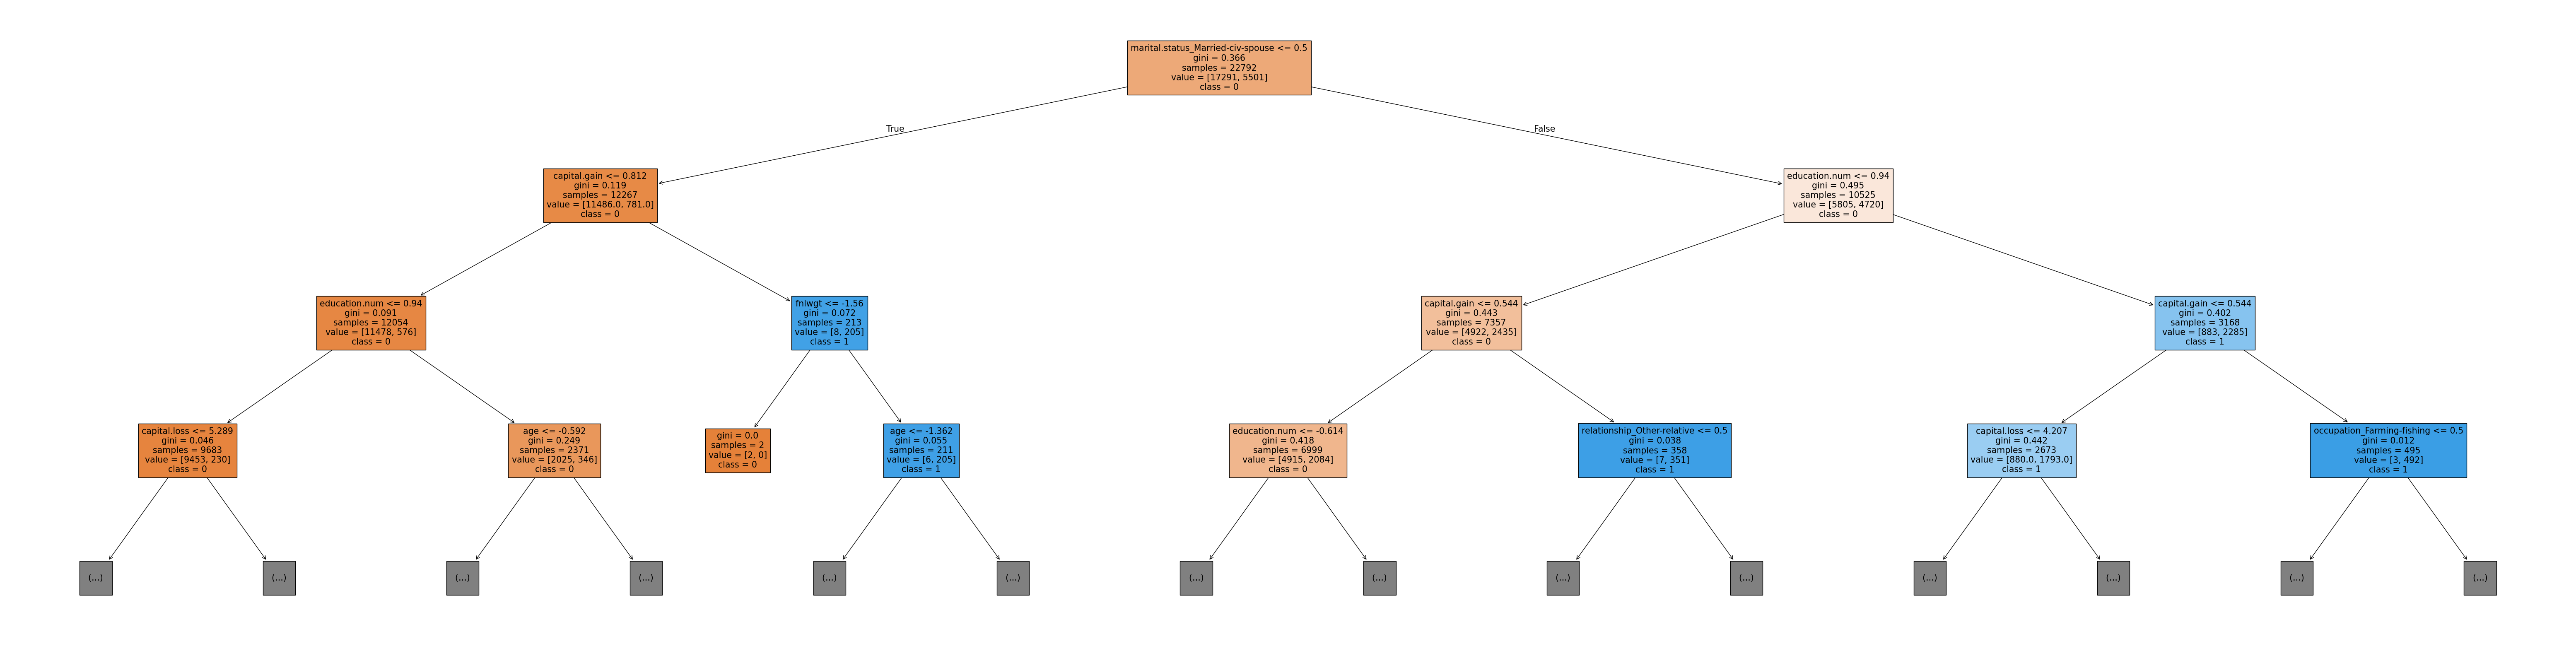

In [54]:
plt.figure(figsize=(80,20))
plot_tree(model1,feature_names=train_input.columns,filled=True,max_depth=3,class_names = class_name);

In [55]:
model1.tree_.max_depth

51

In [56]:
tree_text = export_text(model1,max_depth=10,feature_names=list(train_input.columns))
print(tree_text[:5000])

|--- marital.status_Married-civ-spouse <= 0.50
|   |--- capital.gain <= 0.81
|   |   |--- education.num <= 0.94
|   |   |   |--- capital.loss <= 5.29
|   |   |   |   |--- hours.per.week <= 0.33
|   |   |   |   |   |--- marital.status_infrequent_sklearn <= 0.50
|   |   |   |   |   |   |--- age <= -0.45
|   |   |   |   |   |   |   |--- fnlwgt <= -1.57
|   |   |   |   |   |   |   |   |--- fnlwgt <= -1.58
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- fnlwgt >  -1.58
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- fnlwgt >  -1.57
|   |   |   |   |   |   |   |   |--- marital.status_Widowed <= 0.50
|   |   |   |   |   |   |   |   |   |--- occupation_Protective-serv <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- hours.per.week <= 0.17
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |--- hours.per.week >  0.17
|   |   |   |   |   |   |   |   |   

In [57]:
model1.feature_importances_

array([0.10869898, 0.18889479, 0.12616913, 0.10182387, 0.03926409,
       0.06667234, 0.00526097, 0.00606423, 0.00876232, 0.00555884,
       0.01204401, 0.00450059, 0.        , 0.00184177, 0.20097624,
       0.00080697, 0.00235707, 0.00085113, 0.00136508, 0.00101059,
       0.00388269, 0.00955911, 0.01090395, 0.00473615, 0.00362637,
       0.00516926, 0.00385439, 0.        , 0.00803088, 0.00370128,
       0.00773952, 0.00426805, 0.00492687, 0.        , 0.00128184,
       0.00186448, 0.00164414, 0.00151549, 0.00095662, 0.00362111,
       0.00103017, 0.0025472 , 0.00429068, 0.00076784, 0.00564594,
       0.00240552, 0.00465863, 0.0016974 , 0.00021857, 0.00170267,
       0.00042693, 0.00072001, 0.00170945, 0.00070054, 0.00464468,
       0.00262854])

In [58]:
importance_df = pd.DataFrame({"features" : train_input.columns,
                             "importance" : model1.feature_importances_}).sort_values("importance",ascending = False)
print(importance_df.head(10))

                             features  importance
14  marital.status_Married-civ-spouse    0.200976
1                              fnlwgt    0.188895
2                       education.num    0.126169
0                                 age    0.108699
3                        capital.gain    0.101824
5                      hours.per.week    0.066672
4                        capital.loss    0.039264
10         workclass_Self-emp-not-inc    0.012044
22         occupation_Exec-managerial    0.010904
21            occupation_Craft-repair    0.009559


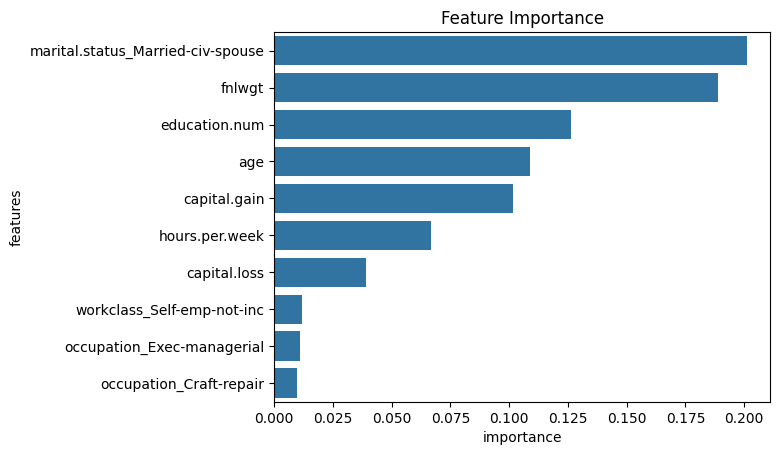

In [59]:
plt.title("Feature Importance")
sns.barplot(data = importance_df.head(10),x="importance",y="features");

In [60]:
def max_depth_error(md):
  model = DecisionTreeClassifier(max_depth=md,random_state=42)
  model.fit(train_input,train_target)
  train_acc = 1 - model.score(train_input,train_target)
  val_acc = 1 - model.score(val_input,val_target)
  return {"max_depth" : md, "train_error" : train_acc, "val_error" : val_acc}

In [61]:
error_df = pd.DataFrame([ max_depth_error(md) for md in range(3,46,2)])

In [62]:
pd.set_option("display.max_rows",None)

In [63]:
error_df

,max_depth,train_error,val_error
0,3,0.156020,0.163800
1,5,0.147552,0.153972
2,7,0.142067,0.148034
3,9,0.135574,0.150901
4,11,0.123245,0.158272
5,13,0.110565,0.156634
6,15,0.095823,0.162572
7,17,0.079238,0.164005
8,19,0.064628,0.168714
9,21,0.052299,0.173833


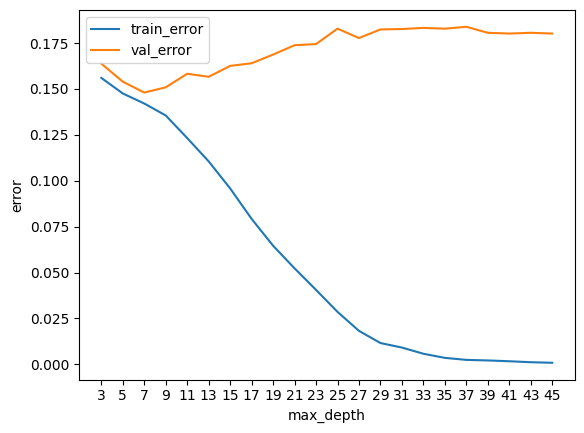

In [64]:
plt.figure()
plt.plot(error_df["max_depth"],error_df["train_error"])
plt.plot(error_df["max_depth"],error_df["val_error"])
plt.xticks(range(3,46,2))
plt.xlabel("max_depth")
plt.ylabel("error")
plt.legend(["train_error","val_error"])
plt.show()

In [65]:
k = int(len(train_input)/np.sqrt(len(train_input)))
k

150

In [66]:
len(train_input)

22792

In [67]:
max_leaf_nodes = min(2**9,len(train_input)//k)

In [68]:
max_leaf_nodes

151

In [69]:
results = []

In [70]:
for depth in [9,10] :
  for max_leaf_node in range(5,max_leaf_nodes,5):
    model = DecisionTreeClassifier(max_depth=depth,max_leaf_nodes=max_leaf_node,random_state=42)
    model.fit(train_input,train_target)
    train_acc = 1 - model.score(train_input,train_target)
    val_acc = 1 - model.score(val_input,val_target)
    results.append({"max_depths" : depth, "max_leaf_nodes" : max_leaf_node, "train_error": train_acc, "val_error" : val_acc})

In [71]:
error_df = pd.DataFrame(results)
error_df.drop_duplicates()

,max_depths,max_leaf_nodes,train_error,val_error
0,9,5,0.156107,0.163800
1,9,10,0.150535,0.158477
2,9,15,0.146806,0.150696
3,9,20,0.145753,0.150491
4,9,25,0.145402,0.150287
5,9,30,0.143735,0.150287
6,9,35,0.142945,0.149672
7,9,40,0.142550,0.149263
8,9,45,0.142199,0.148239
9,9,50,0.140883,0.149058


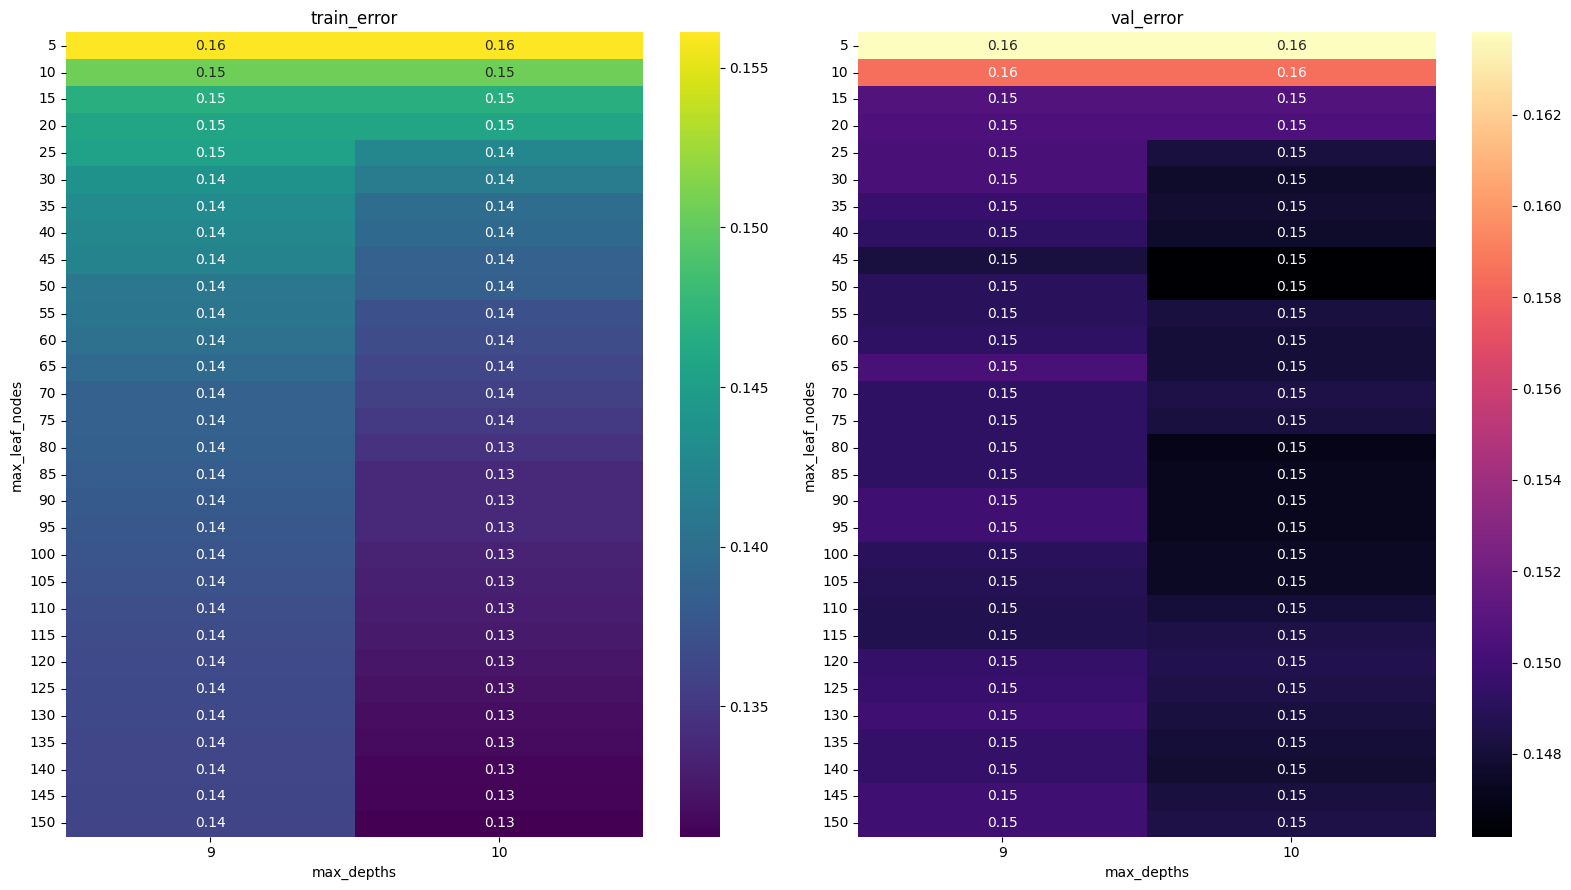

In [72]:
fig , axes = plt.subplots(1,2,figsize=(16,9))

train_pivot = error_df.pivot(index="max_leaf_nodes",columns="max_depths",values="train_error")
val_pivot = error_df.pivot(index="max_leaf_nodes",columns="max_depths",values="val_error")

sns.heatmap(train_pivot,ax=axes[0],annot=True,cmap="viridis")
axes[0].set_title("train_error")

sns.heatmap(val_pivot,ax=axes[1],annot=True,cmap="magma")
axes[1].set_title("val_error")

plt.tight_layout()
plt.show()

In [73]:
model2 = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=50,random_state=42)
model2.fit(train_input,train_target)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=50, random_state=42)

In [74]:
?DecisionTreeClassifier

In [75]:
model2.score(train_input,train_target)

0.8615303615303616

In [76]:
model2.score(val_input,val_target)

0.8538083538083538

In [77]:
model2.score(test_input,test_target)

0.8589559877175026

In [78]:
pd.reset_option("display.max_rows")

In [79]:
clt = DecisionTreeClassifier(random_state=42)
path = clt.cost_complexity_pruning_path(train_input,train_target)
ccp_alphas , impurities = path.ccp_alphas , path.impurities

In [80]:
ccp_alphas.shape

(1223,)

In [81]:
impurities.shape

(1223,)

In [82]:
from joblib import Parallel,delayed

In [83]:
def train_trees(alpha):
  clt = DecisionTreeClassifier(random_state=42,max_depth=10,ccp_alpha=alpha)
  clt.fit(train_input,train_target)
  return clt

In [84]:
sample_of_ccp_alphas = ccp_alphas[::25]

In [85]:
sample_of_ccp_alphas.shape

(49,)

In [86]:
clts_full = Parallel(n_jobs=-1)(delayed(train_trees)(alpha) for alpha in sample_of_ccp_alphas)

In [87]:
clts_full

[DecisionTreeClassifier(ccp_alpha=np.float64(0.0), max_depth=10, random_state=42),
 DecisionTreeClassifier(ccp_alpha=np.float64(2.716074144645574e-05),
                        max_depth=10, random_state=42),
 DecisionTreeClassifier(ccp_alpha=np.float64(2.881988176105826e-05),
                        max_depth=10, random_state=42),
 DecisionTreeClassifier(ccp_alpha=np.float64(2.9250029250029248e-05),
                        max_depth=10, random_state=42),
 DecisionTreeClassifier(ccp_alpha=np.float64(3.2906282906282906e-05),
                        max_depth=10, random_state=42),
 DecisionTreeClassifier(ccp_alpha=np.float64(3.5100035100035094e-05),
                        max_depth=10, random_state=42),
 DecisionTreeClassifier(ccp_alpha=np.float64(3.656253656253656e-05),
                        max_depth=10, random_state=42),
 DecisionTreeClassifier(ccp_alpha=np.float64(3.760718046432333e-05),
                        max_depth=10, random_state=42),
 DecisionTreeClassifier(ccp_alpha=np.fl

In [88]:
len(clts_full)

49

In [89]:
clts = clts_full[:-1].copy()
sample_of_alphas = sample_of_ccp_alphas[:-1].copy()

In [90]:
len(clts)

48

In [91]:
sample_of_alphas.shape

(48,)

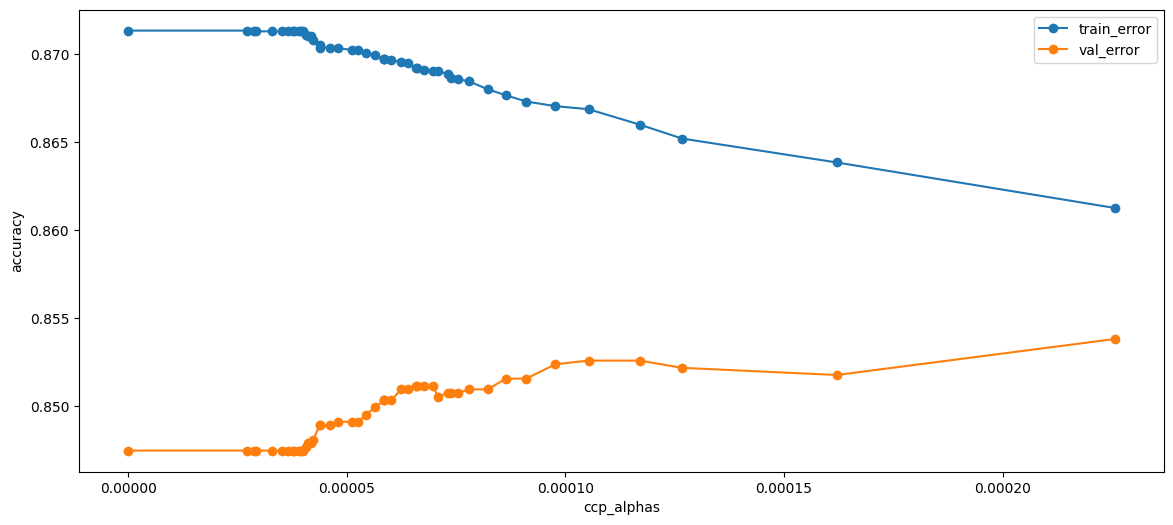

In [92]:
plt.figure(figsize=(14,6))

train_error = [clt.score(train_input,train_target) for clt in clts]
val_error = [clt.score(val_input,val_target) for clt in clts]

plt.plot(sample_of_alphas,train_error,marker="o",label="train_error")
plt.plot(sample_of_alphas,val_error,marker="o",label="val_error")
plt.xlabel("ccp_alphas")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [93]:
index_of_max_alpha = np.argmax(val_error)
best_alpha = sample_of_alphas[index_of_max_alpha]
print(f"best_alpha : {best_alpha}")

best_alpha : 0.00022559151377676487


In [94]:
val_error[index_of_max_alpha]

0.8538083538083538

In [95]:
def test_params(**params):             # This is to not repeatedly make the model again and ageain
  model = DecisionTreeClassifier(random_state=42,**params).fit(train_input,train_target)
  return f"trin_acc : {model.score(train_input,train_target)} , val_ac : {model.score(val_input,val_target)}"

In [96]:
# GridSearchCV

In [97]:
parameters ={
    "criterion" : ["gini","entropy","log_loss"],
    "splitter"  : ["best","random"],
    "max_depth" : [10],
    "max_leaf_nodes" : [50],
    "max_features" : ["sqrt","log2"],
    "min_samples_split" : [500,0.04,1000,0.01,0.05],
    "min_samples_leaf" : [3,5,10,20,0.005,0.01],
    "ccp_alpha" : [best_alpha]

}

In [98]:
%%time
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(DecisionTreeClassifier(random_state=24),param_grid=parameters,cv=5,n_jobs=-1,verbose=2)
grid.fit(train_input,train_target)
grid.best_params_

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
CPU times: user 13.1 s, sys: 21.2 s, total: 34.3 s
Wall time: 1min 49s


{'ccp_alpha': np.float64(0.00022559151377676487),
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': 50,
 'min_samples_leaf': 5,
 'min_samples_split': 500,
 'splitter': 'best'}

In [99]:
best_model = grid.best_estimator_
best_model.score(train_input,train_target)

0.8404264654264654

In [100]:
best_model.score(val_input,val_target)

0.8325143325143325

In [101]:
best_model.score(test_input,test_target)

0.837871033776868

In [102]:
test_params(criterion="gini",max_depth=10,max_features = "sqrt",max_leaf_nodes=50,min_samples_leaf=5,min_samples_split=500,splitter="best",ccp_alpha=best_alpha)

'trin_acc : 0.8244120744120744 , val_ac : 0.811015561015561'

In [103]:
import joblib

In [104]:
Census_income = {
    "model" : best_model,
    "imputer" : imputer,
    "encoder" : encoder,
    "scaler" : scaler
}

In [105]:
joblib.dump(Census_income,"Decision_tree_Census_income.joblib")

['Decision_tree_Census_income.joblib']

In [106]:
Census_income2 = joblib.load("Decision_tree_Census_income.joblib")

In [107]:
def prediction_u_decision_tree(input):
  prediction = Census_income2["model"].predict(input)
  output = pd.DataFrame(prediction)
  return output

In [108]:
prediction_u_decision_tree(test_input)

,0
0,0
1,0
2,0
3,0
4,0
...,...
4880,0
4881,0
4882,1
4883,0


In [142]:
# Using random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [143]:
base_model_R = RandomForestClassifier(random_state=42,n_jobs=-1)

In [144]:
base_model_R.fit(train_input,train_target)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [145]:
base_model_R.score(train_input,train_target)

1.0

In [183]:
val_acc = base_model_R.score(val_input,val_target)
val_acc

0.8527846027846028

In [184]:
base_model_R.score(test_input,test_target)

0.8593654042988741

In [185]:
base_model_R.predict(train_input)

array([0, 0, 0, ..., 1, 1, 0])

In [186]:
base_model_R.predict_proba(train_input)

array([[0.73, 0.27],
       [1.  , 0.  ],
       [0.95, 0.05],
       ...,
       [0.06, 0.94],
       [0.11, 0.89],
       [1.  , 0.  ]])

In [187]:
base_model_R.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

In [188]:
from sklearn.tree import plot_tree,export_text

In [189]:
base_model_R.classes_

array([0, 1])

In [190]:
classes_name = [str(cls) for cls in base_model_R.classes_]

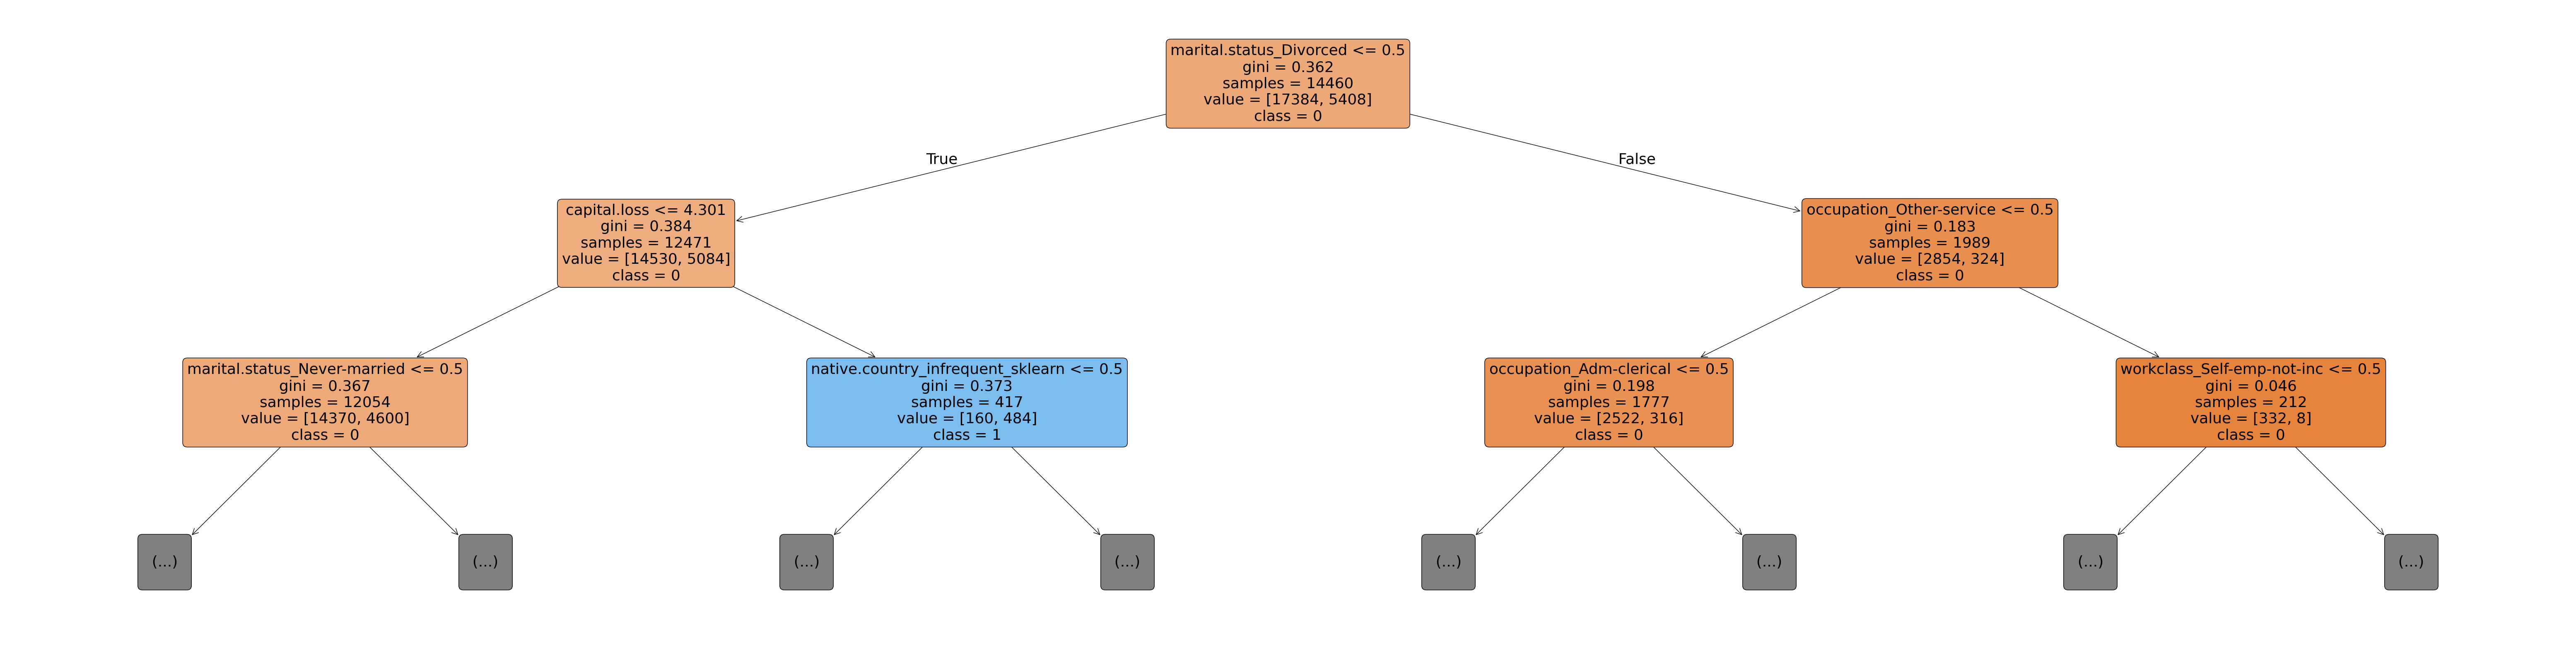

In [191]:
plt.figure(figsize=(80,20))
plot_tree(base_model_R.estimators_[0],feature_names=train_input.columns,max_depth=2,filled=True,class_names=classes_name,rounded=True);

In [192]:
base_model_R.n_estimators

100

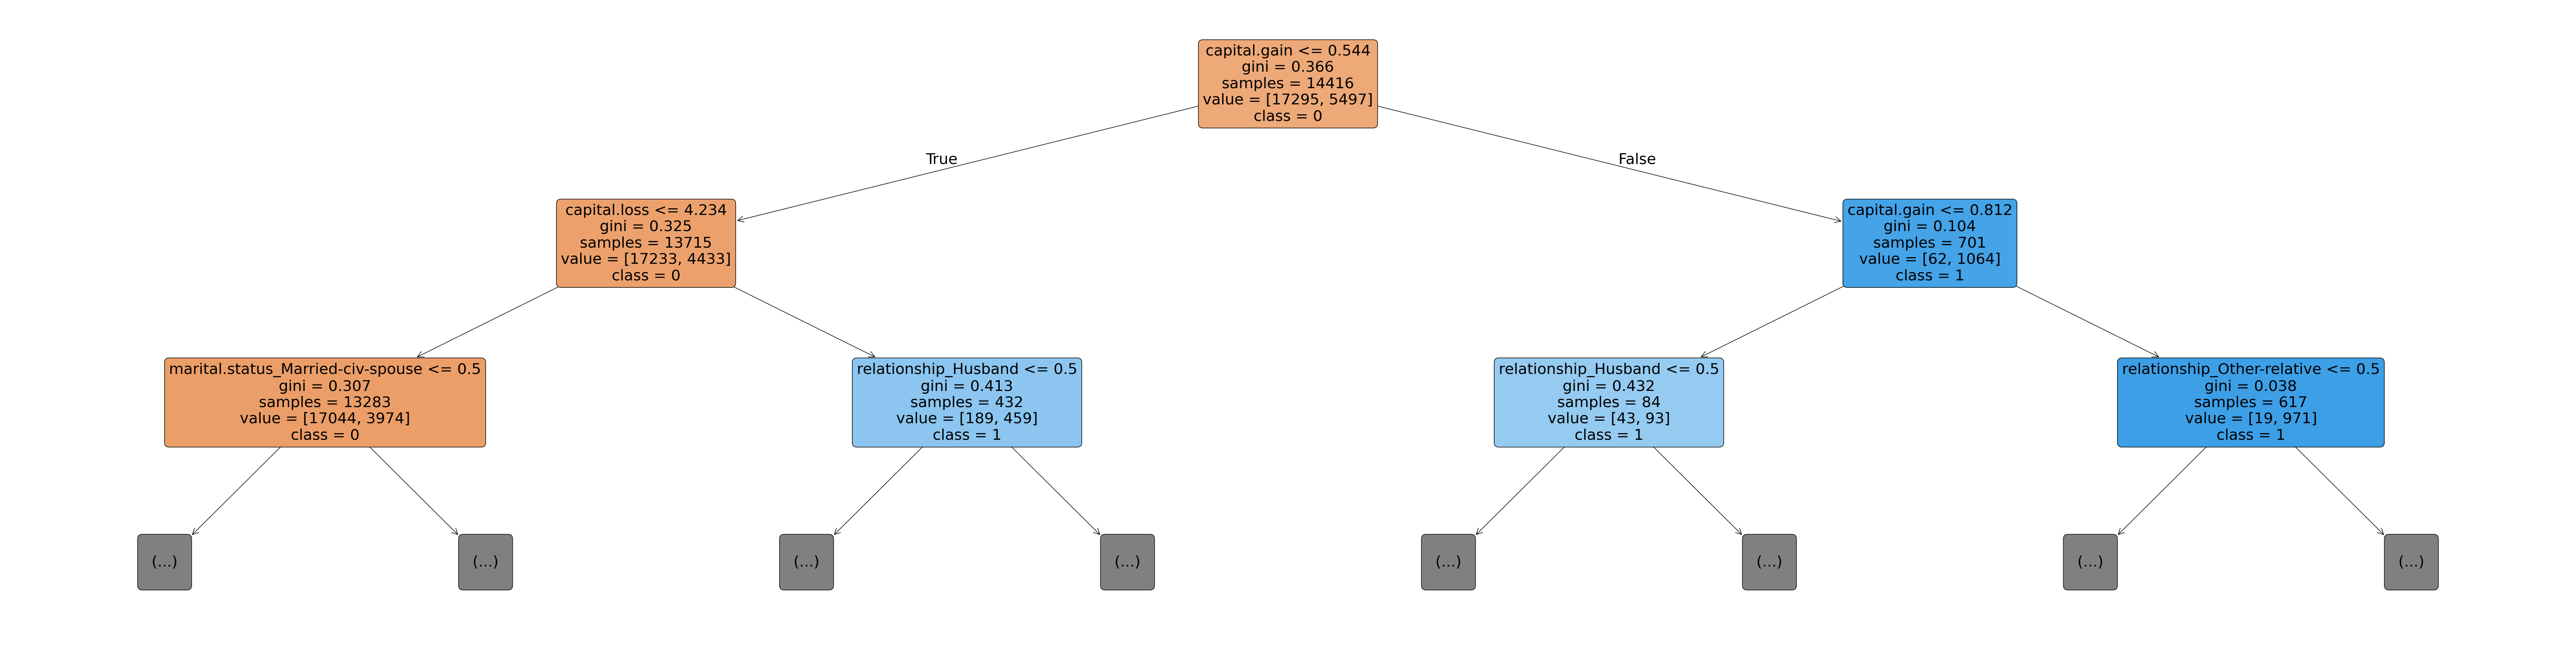

In [193]:
plt.figure(figsize=(80,20))
plot_tree(base_model_R.estimators_[20],feature_names=train_input.columns,max_depth=2,filled=True,class_names=classes_name,rounded=True);

In [194]:
val_target.values

array([1, 0, 0, ..., 0, 1, 0])

In [195]:
best_single_tree_acc = 0

for i,tree in enumerate(base_model_R.estimators_):
  val_acc = tree.score(val_input.values,val_target.values)
  best_single_tree_acc = max(val_acc,best_single_tree_acc)
  print(f"tree {i} : val_acc : {val_acc}")



tree 0 : val_acc : 0.800982800982801
tree 1 : val_acc : 0.8065110565110565
tree 2 : val_acc : 0.795045045045045
tree 3 : val_acc : 0.8065110565110565
tree 4 : val_acc : 0.8046683046683046
tree 5 : val_acc : 0.7946355446355446
tree 6 : val_acc : 0.8083538083538083
tree 7 : val_acc : 0.8093775593775594
tree 8 : val_acc : 0.8040540540540541
tree 9 : val_acc : 0.7960687960687961
tree 10 : val_acc : 0.8065110565110565
tree 11 : val_acc : 0.8003685503685504
tree 12 : val_acc : 0.8024160524160524
tree 13 : val_acc : 0.8124488124488124
tree 14 : val_acc : 0.8073300573300574
tree 15 : val_acc : 0.7997542997542998
tree 16 : val_acc : 0.8085585585585585
tree 17 : val_acc : 0.8116298116298116
tree 18 : val_acc : 0.8134725634725635
tree 19 : val_acc : 0.8056920556920557
tree 20 : val_acc : 0.8126535626535627
tree 21 : val_acc : 0.8126535626535627
tree 22 : val_acc : 0.8095823095823096
tree 23 : val_acc : 0.8136773136773137
tree 24 : val_acc : 0.7975020475020475
tree 25 : val_acc : 0.799549549549549

In [196]:
if best_single_tree_acc > val_acc:
  print("single tree is better")
else:
  print("random forest tree is better ")

random forest tree is better 


In [197]:
importance_df = pd.DataFrame({
    "features" : train_input.columns,
    "importance" : base_model_R.feature_importances_
}).sort_values("importance",ascending=False)

In [198]:
importance_df

,features,importance
1,fnlwgt,0.163190
0,age,0.150728
2,education.num,0.118513
3,capital.gain,0.100575
5,hours.per.week,0.082484
14,marital.status_Married-civ-spouse,0.068545
34,relationship_Husband,0.048453
4,capital.loss,0.033554
16,marital.status_Never-married,0.020028
22,occupation_Exec-managerial,0.019702


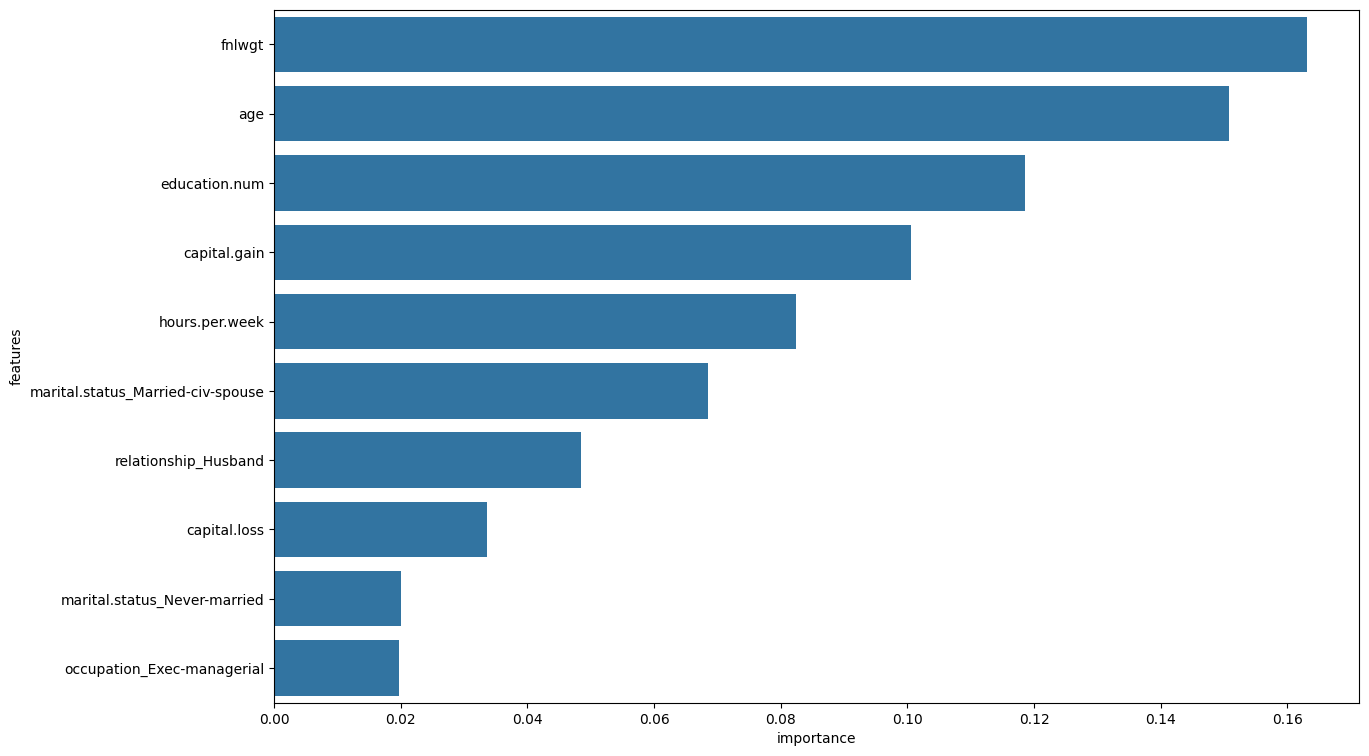

In [199]:
plt.figure(figsize=(14,9))
sns.barplot(data=importance_df.head(10),x="importance",y="features");

In [200]:
def test_params_R(**params):
  model = RandomForestClassifier(random_state=42,n_jobs=-1,**params).fit(train_input,train_target)
  return f"train_acc : {model.score(train_input,train_target)} , val_acc : {model.score(val_input,val_target)}"

In [201]:
list_n_estimators = [50,100,200,300,400]

In [202]:
train_error = []
val_error = []

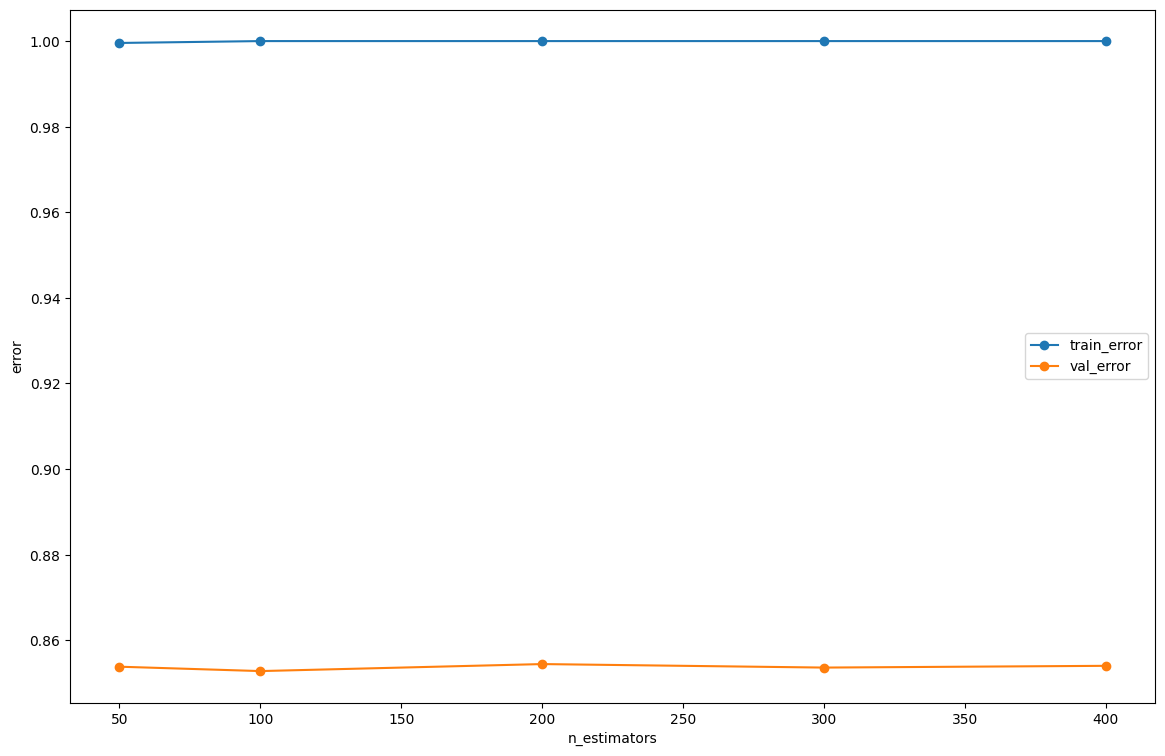

In [203]:
for i in list_n_estimators:
  model = RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1).fit(train_input,train_target)
  train_error.append(model.score(train_input,train_target))
  val_error.append(model.score(val_input,val_target))

plt.figure(figsize=(14,9))
plt.plot(list_n_estimators,train_error,marker="o");
plt.plot(list_n_estimators,val_error,marker="o");
plt.xlabel("n_estimators")
plt.ylabel("error")
plt.legend(["train_error","val_error"])
plt.show()

In [204]:
max_index_of_n_esti = np.argmax(val_error)
best_n_estimators = list_n_estimators[max_index_of_n_esti]
best_n_estimators

200

In [205]:
max_feature_list = list(range(10,70,5)) + ["sqrt","log2"]
max_feature_list

[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 'sqrt', 'log2']

In [206]:
for i in max_feature_list:
  print(f"for {i} max_feature acc is {test_params_R(max_features=i)}")

for 10 max_feature acc is train_acc : 1.0 , val_acc : 0.851965601965602
for 15 max_feature acc is train_acc : 1.0 , val_acc : 0.8548321048321048
for 20 max_feature acc is train_acc : 1.0 , val_acc : 0.8544226044226044
for 25 max_feature acc is train_acc : 1.0 , val_acc : 0.8527846027846028
for 30 max_feature acc is train_acc : 1.0 , val_acc : 0.8523751023751024
for 35 max_feature acc is train_acc : 0.999956124956125 , val_acc : 0.8544226044226044
for 40 max_feature acc is train_acc : 1.0 , val_acc : 0.8511466011466011
for 45 max_feature acc is train_acc : 1.0 , val_acc : 0.8511466011466011
for 50 max_feature acc is train_acc : 0.999956124956125 , val_acc : 0.8536036036036037
for 55 max_feature acc is train_acc : 0.999956124956125 , val_acc : 0.8523751023751024
for 60 max_feature acc is train_acc : 0.999956124956125 , val_acc : 0.8511466011466011
for 65 max_feature acc is train_acc : 0.999956124956125 , val_acc : 0.8511466011466011
for sqrt max_feature acc is train_acc : 1.0 , val_acc :

In [207]:
best_max_feature = "log2"

In [208]:
base_model_R.estimators_[10].tree_.max_depth

44

In [209]:
max_depth_size = 0

In [210]:
for mod in base_model_R.estimators_:
    if mod.tree_.max_depth > max_depth_size :
      max_depth_size = mod.tree_.max_depth

max_depth_size

59

In [211]:
def check_depth(md):
  model_R2 = RandomForestClassifier(random_state = 42,n_jobs=-1,max_depth=md).fit(train_input,train_target)
  train_error = 1 - model_R2.score(train_input,train_target)
  val_error = 1 - model_R2.score(val_input,val_target)
  return {"max_depth" : md ,"train_error" : train_error,"val_error" : val_error}

In [212]:
error_df = pd.DataFrame([check_depth(md) for md in range(3,59,5)])

In [213]:
error_df

,max_depth,train_error,val_error
0,3,0.189584,0.193079
1,8,0.136802,0.148649
2,13,0.117015,0.144144
3,18,0.083187,0.139435
4,23,0.045498,0.141482
5,28,0.017769,0.142301
6,33,0.005221,0.141687
7,38,0.000658,0.144554
8,43,0.000219,0.145373
9,48,0.000000,0.143735


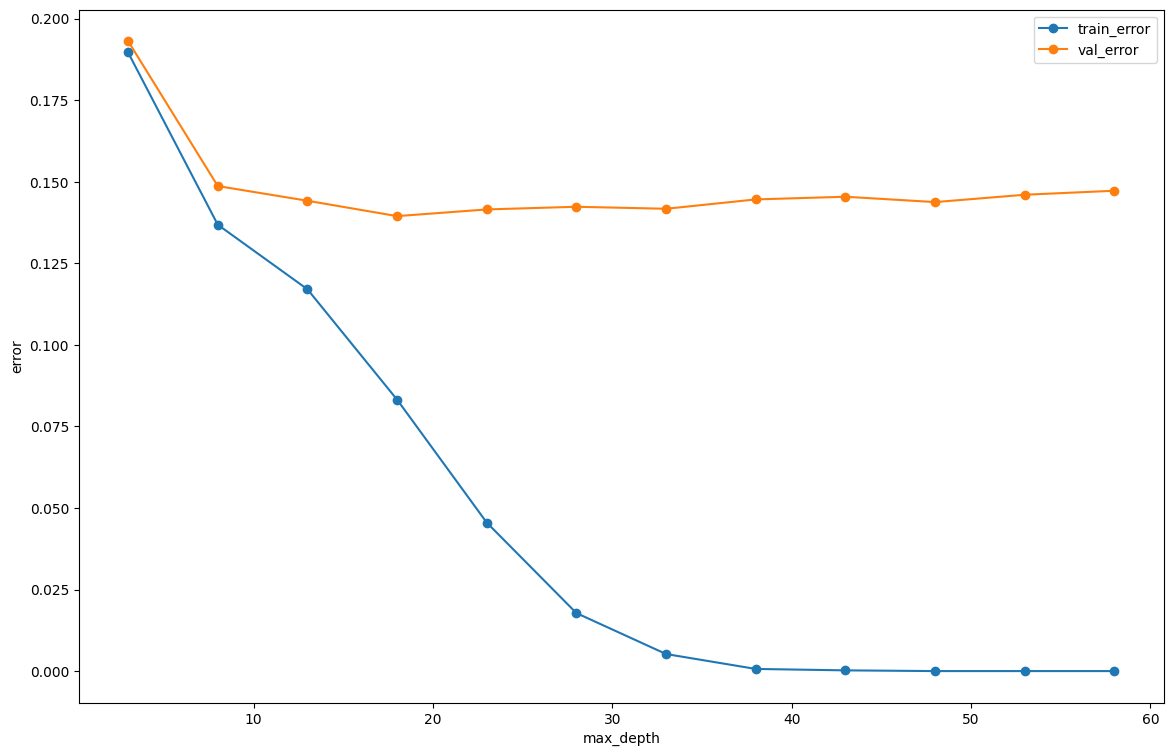

In [214]:

plt.figure(figsize=(14,9))
plt.plot(error_df["max_depth"],error_df["train_error"],marker="o");
plt.plot(error_df["max_depth"],error_df["val_error"],marker="o");
plt.xlabel("max_depth")
plt.ylabel("error")
plt.legend(["train_error","val_error"])
plt.show()

In [238]:
def check_ml(md,ml):
  model_R2 = RandomForestClassifier(random_state = 42,n_jobs=-1,max_depth=md,max_leaf_nodes=ml).fit(train_input,train_target)
  train_error = 1 - model_R2.score(train_input,train_target)
  val_error = 1 - model_R2.score(val_input,val_target)
  return {"max_leaf_nodes" : ml ,"train_error" : train_error,"val_error" : val_error}

In [239]:
best_max_depth = 18

In [240]:
max_leaf_nodes = min(2**best_max_depth,len(train_input)//k)

In [241]:

max_leaf_nodes

151

In [242]:
%%time
error2_df = pd.DataFrame([check_ml(md=best_max_depth,ml=i) for i in range(10,max_leaf_nodes,10)])

CPU times: user 36.6 s, sys: 532 ms, total: 37.1 s
Wall time: 23 s


In [243]:
error2_df

,max_leaf_nodes,train_error,val_error
0,10,0.157599,0.166462
1,20,0.146894,0.158272
2,30,0.142726,0.152948
3,40,0.139830,0.151310
4,50,0.137987,0.150491
5,60,0.136276,0.148444
6,70,0.135179,0.145987
7,80,0.133819,0.145782
8,90,0.133424,0.145168
9,100,0.132108,0.145782


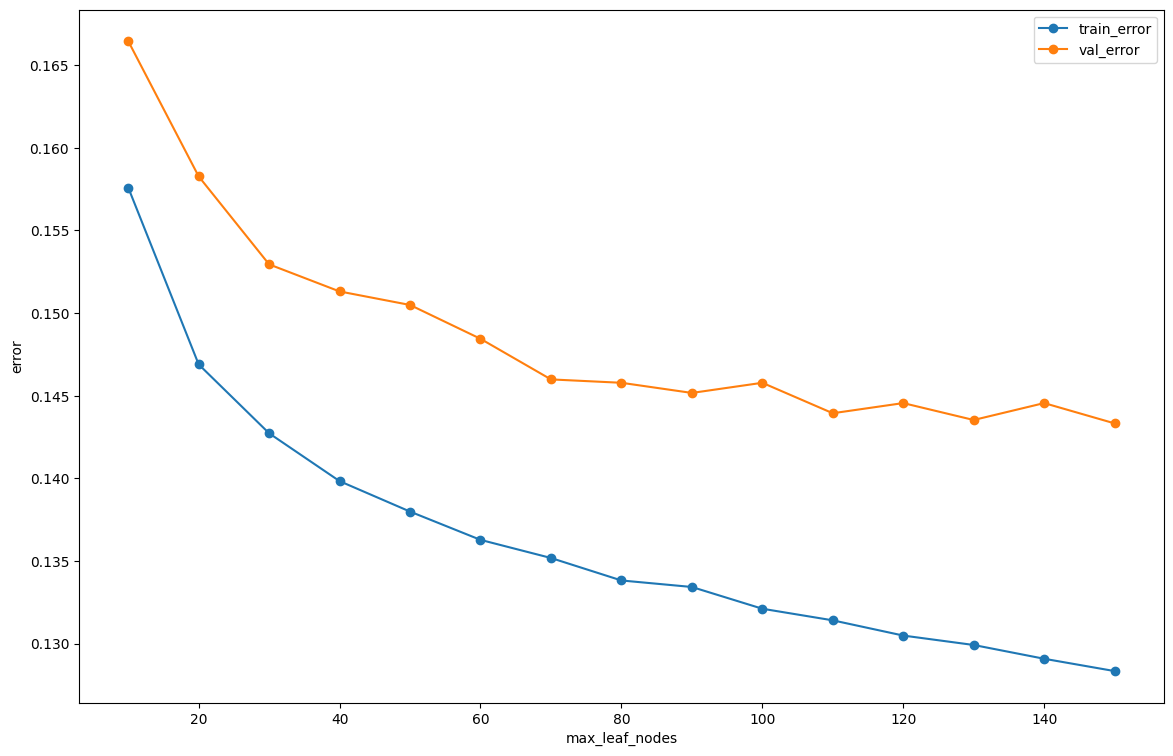

In [244]:
plt.figure(figsize=(14,9))
plt.plot(error2_df["max_leaf_nodes"],error2_df["train_error"],marker="o");
plt.plot(error2_df["max_leaf_nodes"],error2_df["val_error"],marker="o");
plt.xlabel("max_leaf_nodes")
plt.ylabel("error")
plt.legend(["train_error","val_error"])
plt.show()

In [259]:
best_max_leaf_nodes= 151

In [245]:
test_params_R(min_samples_split=3,min_samples_leaf = 2)

'train_acc : 0.9181291681291681 , val_acc : 0.8607698607698607'

In [249]:
test_params_R(min_samples_split=30,min_samples_leaf =20)

'train_acc : 0.8647332397332397 , val_acc : 0.8538083538083538'

In [252]:
test_params_R(bootstrap=False)

'train_acc : 1.0 , val_acc : 0.8507371007371007'

In [270]:
test_params_R(min_impurity_decrease= 1e-6)

'train_acc : 0.9867936117936118 , val_acc : 0.8585176085176085'

In [271]:
test_params_R(min_impurity_decrease= 1e-2)

'train_acc : 0.7876886626886627 , val_acc : 0.7862407862407862'

In [253]:
test_params_R(bootstrap=True)

'train_acc : 1.0 , val_acc : 0.8527846027846028'

In [256]:
train_target.value_counts()

,count
income,
0,17291
1,5501


In [257]:
train_target.value_counts()/len(train_target)

,count
income,
0,0.758643
1,0.241357


In [267]:
random_forest_parameters = {
    "n_estimators" : [best_n_estimators],
    "max_depth" : [best_max_depth],
    "max_leaf_nodes" : [best_max_leaf_nodes],
    "max_features" : [best_max_feature],
    "min_samples_split" : [2,4,8,16,32],
    "min_samples_leaf" : [1,8,32,64],
    "max_samples" : [0.5,0.7,0.9],
    "class_weight" : ["balanced",{0:1,1:1.5},{0:1,1:2}]
}

In [283]:
from sklearn.model_selection import GridSearchCV

In [269]:
apply_grid_search = False
if apply_grid_search:
  cv = GridSearchCV(RandomForestClassifier(random_state=42,n_jobs=-1),param_grid = random_forest_parameters,scoring = "accuracy",cv=5,verbose=2)
  cv.fit(train_input,train_target)
  cv.best_params_

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END class_weight=balanced, max_depth=18, max_features=log2, max_leaf_nodes=151, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.3s
[CV] END class_weight=balanced, max_depth=18, max_features=log2, max_leaf_nodes=151, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.3s
[CV] END class_weight=balanced, max_depth=18, max_features=log2, max_leaf_nodes=151, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END class_weight=balanced, max_depth=18, max_features=log2, max_leaf_nodes=151, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END class_weight=balanced, max_depth=18, max_features=log2, max_leaf_nodes=151, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END class_weight=balanced, max_d

{'class_weight': {0: 1, 1: 1.5},
 'max_depth': 18,
 'max_features': 'log2',
 'max_leaf_nodes': 151,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 32,
 'n_estimators': 200}

In [272]:
if apply_grid_search:
  best_model_R = cv.best_estimator_

In [273]:
if apply_grid_search:
  best_model_R.score(train_input,train_target)

0.8686819936819937

In [274]:
if apply_grid_search:
  best_model_R.score(val_input,val_target)

0.8531941031941032

In [275]:
if apply_grid_search:
  best_model_R.score(test_input,test_target)

0.8677584442169908

In [276]:
base_model_R.score(val_input,val_target)

0.8527846027846028

In [279]:
best_model_R2 = RandomForestClassifier(random_state=42,n_jobs=-1,max_depth=18,class_weight={0: 1, 1: 1.5},max_features="log2",max_leaf_nodes=151,max_samples=0.7,min_samples_leaf=1,min_samples_split=32,n_estimators=200).fit(train_input,train_target)

In [280]:
best_model_R2.score(train_input,train_target)

0.8686819936819937

In [281]:
best_model_R2.score(val_input,val_target)

0.8531941031941032

In [282]:
best_model_R2.score(test_input,test_target)

0.8677584442169908

In [291]:
best_model_R2.predict(val_input)[0]

np.int64(1)

In [285]:
census_income_R = {
    "model" : best_model_R2,
    "imputer" : imputer,
    "encoder" : encoder,
    "scaler" : scaler
}

In [286]:
joblib.dump(census_income_R,"Random_forest_census_income.joblib")

['Random_forest_census_income.joblib']

In [293]:
model_R = joblib.load("Random_forest_census_income.joblib")

In [296]:
def predict_input(input):
  input_data = pd.DataFrame(input)
  input_data[cate_columns] = imputer.transform(input_data[cate_columns])
  input_data[encoded_col] = encoder.transform(input_data[cate_columns])
  input_data[numeric_col] = scaler.transform(input_data[numeric_coll])
  pred = model_R["model"].predict(input_data)[0]
  prob = model_R["model"].proba(input_data)[0][list(model_R["model"].classes_).index(pred)]
  return pred,prob
